In [1]:
import numpy as np
from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io

import nelpy as nel  # recommended import for nelpy
import nelpy.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

from nelpy import EpochArray, AnalogSignalArray, SpikeTrainArray, BinnedSpikeTrainArray

In [2]:
nel

<module 'nelpy' from '/home/shayok/Documents/Code/nelpy/nelpy/__init__.py'>

# TODO
1. <s>Change ydata from columns data to row data </s><br>
1. Look at SpikeTrainArray<br>
1. Implement remaining "Stuff to add" <br>
1. Scrutinize ASA in terms of efficiency and check for obvious improvements<br>
1. Push changes!<br>
1. Add in Trodes data extraction <br>

# Stuff to add
- support single values ASA([1]) -- DONE!<br>
- empty values ASA([]) -- FIXED!<br>
- out of bounds errors! -- FIXED!<br>
- Subset functionality https://github.com/eackermann/nelpy/issues/126 -- DONE!<br>
- mean, std, min, max, with axis flag https://github.com/eackermann/nelpy/issues/127 -- DONE!<br>
- empty object pattern and attributes....https://github.com/eackermann/nelpy/issues/85

# Bugs found
- Time for multidimensional data without timestamps or time stamps in seconds provided may not have been calculated correctly -- FIXED <br><br>

# Basic AnalogSignalArray Functionality

## Just tryin to break it a lil bit

In [3]:
my_lfp = AnalogSignalArray([])
# my_lfp.ydata
# my_lfp.support
my_lfp

<empty AnalogSignal at 0x7fa514357c88>

In [4]:
moo = [1,2,3]
print(np.asarray(moo).shape)
moo = np.squeeze(moo).astype(float)
moo = np.array(moo,ndmin=2)
moo.shape

(3,)


(1, 3)

In [5]:
asa = AnalogSignalArray([1,2,3])
asa.support.duration

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1479: UserWarning: support created with given ydata! support is entire signal


2.0

In [6]:
asa = AnalogSignalArray([[1],[2],[3]])
print(asa.mean())
print(asa.std())
print(asa.min())
print(asa.max())
asa

[ 2.]
[ 0.81649658]
[ 1.]
[ 3.]


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1479: UserWarning: support created with given ydata! support is entire signal


<AnalogSignalArray at 0x7fa4e646bb00: 1 signals> for a total of 2 seconds

In [7]:
asa2 = AnalogSignalArray([[1,2],[2,2],[3,2]])
asa2[EpochArray([2,3])]

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1479: UserWarning: support created with given ydata! support is entire signal
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:66: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:66: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:830: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:66: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:830: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:66: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1033: UserWarning: sampling rates are different; intersecting along time only and throwing away fs
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1519: UserWarning: Support specified i

<empty AnalogSignal at 0x7fa4e646b9b0>

In [8]:
cow = np.array([[1,3],[2,3]])
np.zeros([0]).shape

(0,)

In [9]:
cow = nel.SpikeTrainArray([[1,2,3],[4.5]], support=EpochArray(empty=True))
cow.time


array([], shape=(2, 0), dtype=float64)

In [10]:
asa = nel.AnalogSignalArray([[3,4,5],[5,6,7]], tdata=[2,3,4], support=nel.EpochArray(empty=True))
print(asa.ydata)

[]


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1519: UserWarning: Support specified is empty
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1442: UserWarning: support created with specified epoch array but no specified sampling rate
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1444: UserWarning: Support is empty. Empty AnalogSignalArray returned


# get_contiguous_segments *sigh*

In [3]:
import warnings

In [4]:
def get_contiguous_segments(data,step=None, sort=False):
    """Compute contiguous segments (seperated by step) in a list.

    WARNING! This function assumes that a sorted list is passed.
    If this is not the case (or if it is uncertain), use sort=True
    to force the list to be sorted first.

    Returns an array of size (n_segments, 2), with each row
    being of the form ([start, stop]) inclusive.
    """
    from itertools import groupby
    from operator import itemgetter

    if step is None:
        step = 1
    if sort:
        data = np.sort(data)  # below groupby algorithm assumes sorted list
    if np.any(np.diff(data) < step):
        warnings.warn("some steps in the data are smaller than the requested step size.")

    bdries = []

    for k, g in groupby(enumerate(data), lambda ix: (round(100*step*ix[0] - 100*ix[1])//10)):
        f = itemgetter(1)
        gen = (f(x) for x in g)
        start = next(gen)
        stop = start
        for stop in gen:
            pass
        bdries.append([start, stop])

    return np.asarray(bdries)

In [5]:
get_contiguous_segments(xdata,step=np.min(np.diff(xdata)))

NameError: name 'xdata' is not defined

In [38]:
xdata/4

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.75,  2.  ,  2.25,  2.5 ])

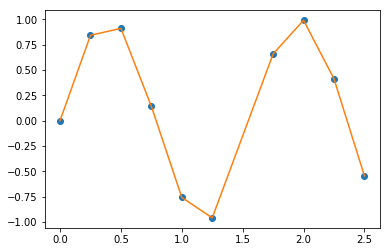

In [5]:
xdata = np.array([0,1,2,3,4,5,7,8,9,10])
ydata = np.sin(xdata)
plt.plot(xdata/4,ydata,'o')
plt.plot(xdata/4,ydata)

In [6]:
np.diff(xdata)

array([1, 1, 1, 1, 1, 2, 1, 1, 1])

In [7]:
np.min(np.diff(xdata))

1

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1433: UserWarning: support created with given tdata and sampling rate, fs!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:835: UserWarning: meta data is not available


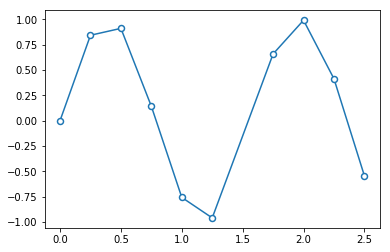

In [8]:
# myasa = AnalogSignalArray(ydata,tdata=xdata,fs=4,step=np.min(np.diff(xdata)))
myasa = AnalogSignalArray(ydata, tdata=xdata,fs=4,step=1,merge_sample_gap=0.5)
npl.plot(myasa,marker='o')
# for segment in myasa:
#     print(segment._ydata_colsig)

## Ting Data

In [3]:
scipy.io.whosmat("/home/shayok/Downloads/simiplified(Newton, 2015-03-11_15-09-22).mat")

[('eeg', (5665280, 1), 'double'),
 ('eegtimestamp', (5665280, 1), 'double'),
 ('spike_track1', (1, 24), 'cell'),
 ('spike_track2', (1, 24), 'cell'),
 ('pos_timestamp_track2', (27003, 1), 'double'),
 ('pos_track1', (1, 27453), 'double'),
 ('pos_track2', (1, 27003), 'double'),
 ('pos_timestamp_track1', (27453, 1), 'double')]

In [9]:
tingData = scipy.io.loadmat("/home/shayok/Downloads/simiplified(Newton, 2015-03-11_15-09-22).mat")
eeg = tingData["eeg"]
eegTimeStamps = tingData["eegtimestamp"]
pos_track1 = tingData['pos_track1']
pos_track2 = tingData['pos_track2']
pos_timestamp_track1 = tingData['pos_timestamp_track1']
pos_timestamp_track2 = tingData['pos_timestamp_track2']
FS_ting = 10000

In [10]:
position = AnalogSignalArray(pos_track1,tdata=pos_timestamp_track1)
position

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1462: UserWarning: support created with just tdata! no sampling rate specified so  support is entire range of signal with Epochs separted by time step difference from first time to second time
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:68: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:835: UserWarning: meta data is not available


<AnalogSignalArray at 0x7feb6e120518: 1 signals (27,452 segments)> for a total of 2:58 minutes

In [11]:
positionData = AnalogSignalArray(pos_track1, tdata=pos_timestamp_track1, fs=10000, step=333, merge_sample_gap=10)
positionData

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1433: UserWarning: support created with given tdata and sampling rate, fs!
/home/shayok/Documents/Code/nelpy/nelpy/utils.py:164: UserWarning: some steps in the data are smaller than the requested step size.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:835: UserWarning: meta data is not available


<AnalogSignalArray at 0x7feb6e069c18: 1 signals> for a total of 15:14:980 minutes

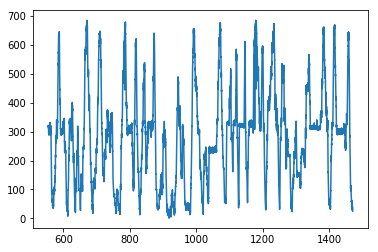

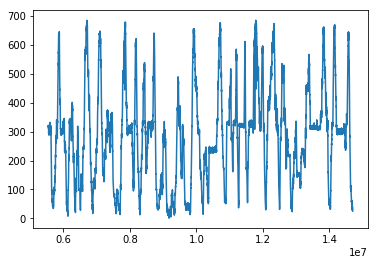

In [22]:
# npl.plot(position)
# plt.show()
npl.plot(positionData)
plt.show()
pos_timestamp_track1.squeeze().shape,pos_track1.shape
plt.plot(pos_timestamp_track1.squeeze(),pos_track1.squeeze())

In [24]:
positionData.tdata

array([  5550018.,   5550355.,   5550683., ...,  14699144.,  14699482.,
        14699816.])

In [23]:
positionData.time

array([  555.0018,   555.0355,   555.0683, ...,  1469.9144,  1469.9482,
        1469.9816])

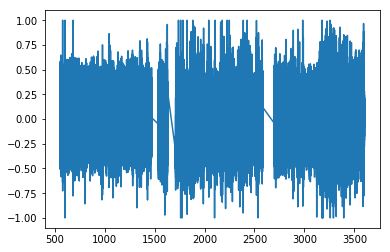

In [12]:
plt.plot(eegTimeStamps, eeg)
plt.show()

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1453: UserWarning: support created with just tdata! no sampling rate specified so support is entire range of signal
/home/shayok/Documents/Code/nelpy/nelpy/utils.py:164: UserWarning: some steps in the data are smaller than the requested step size.


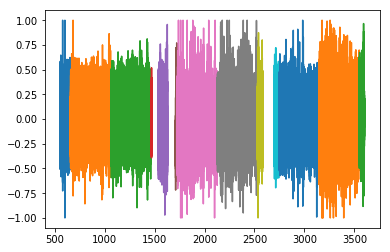

<AnalogSignalArray at 0x7fa4daa67860: 1 signals (13 segments)> for a total of 46:24:593 minutes

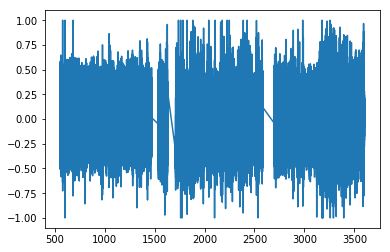

In [13]:
my_time_series = AnalogSignalArray([eeg],tdata=eegTimeStamps,)
npl.plot(my_time_series)
plt.show()
plt.plot(eegTimeStamps, eeg)
my_time_series

In [14]:
my_time_series.support.durations

array([ 105.69602911,  402.65272911,  402.65282911,    5.28442911,
         92.35812911,   14.09242911,  402.65282911,  402.65282911,
         54.86102911,   44.54312911,  402.90442911,  402.65272911,
         51.58952911])

In [15]:
my_time_series.support.merge(gap=0.1)

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:66: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:830: UserWarning: meta data is not available


<EpochArray at 0x7fa4daa22e80: 4 epochs> of duration 46:24:597 minutes

In [16]:
my_time_series._support = my_time_series.support.merge(gap=0.1)
my_time_series.support.durations

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:66: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:830: UserWarning: meta data is not available


array([ 916.28722911,   92.35812911,  874.26022911,  901.69102911])

In [17]:
my_time_series

<AnalogSignalArray at 0x7fa4daa67860: 1 signals (4 segments)> for a total of 46:24:597 minutes

## My Data

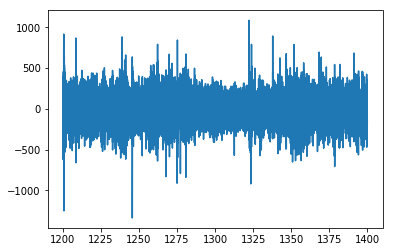

In [3]:
myFile = np.load('/home/shayok/Downloads/LFP.npz')
lfp = myFile['dataT2C1']*0.195
onlineRippleDetect = myFile['onlineRippleDetect']
offlineRippleDetect = myFile['offlineRippleDetections']
timeStampsSeconds = myFile['timeStampsSeconds']
timeStamps = myFile['timeStamps']
plt.plot(timeStampsSeconds,lfp)
plt.show()

In [4]:
timeStamps[0],timeStamps[1],timeStampsSeconds

(36019940, 36019950)

In [ ]:
moo_lfp = AnalogSignalArray(lfp,tdata=timeStampsSeconds,fs_meta=30000,step=)

In [6]:
my_lfp = AnalogSignalArray([lfp,onlineRippleDetect],tdata=timeStamps,fs=30000,step=10)
print("Mean")
print(my_lfp.mean())
print(np.mean([lfp,onlineRippleDetect],axis=1))
print("Standard Deviation")
print(my_lfp.std())
print(np.std([lfp,onlineRippleDetect],axis=1))
print("min")
print(my_lfp.min())
print(np.amin([lfp,onlineRippleDetect],axis=1))
print("max")
print(my_lfp.max())
print(np.amax([lfp,onlineRippleDetect],axis=1))

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1434: UserWarning: support created with given tdata and sampling rate, fs!


Mean
[-0.1089335   0.63333333]
[-0.1089335   0.63333333]
Standard Deviation
[ 135.26496947   56.26957931]
[ 135.26496947   56.26957931]
min
[-1338.87     0.  ]
[-1338.87     0.  ]
max
[ 1087.905  5000.   ]
[ 1087.905  5000.   ]


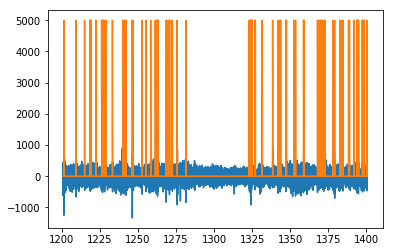

In [7]:
npl.plot(my_lfp)

In [21]:
etiennes_lfp=AnalogSignalArray([[1,5],[2,5,],[3,5]])
etiennes_lfp.min()

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1479: UserWarning: support created with given ydata! support is entire signal


array([ 1.,  2.,  3.])

In [22]:
my_lfp.n_signals

1

<EpochArray at 0x7fa4da8d93c8: 4 epochs> of duration 1:54 minutes


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


<AnalogSignalArray at 0x7fa4da8d97f0: 3 signals (4 segments)> for a total of 1:54 minutes

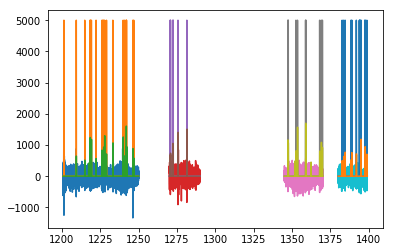

In [23]:
partialSupport = EpochArray([[1200,1250], [1270,1290], [1345,1370],[1380,1399]],fs=1)
my_lfp = AnalogSignalArray([lfp,onlineRippleDetect,offlineRippleDetect],tdata=timeStamps,support=partialSupport,fs=30000,step=10)
npl.plot(my_lfp)
print(my_lfp.support)
my_lfp

In [24]:
my_lfp._ydata.shape

(3, 340010)

In [25]:
my_lfp.support.durations

array([ 50.,  20.,  25.,  19.])

In [26]:
my_lfp.n_epochs

4

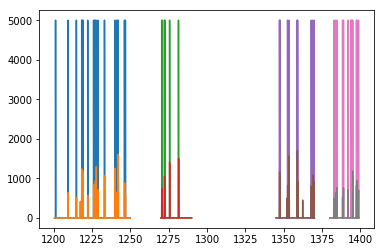

In [27]:
npl.plot(my_lfp._subset([1,2]))

[array([ -0.21025995,   0.12837231,  47.93591353]), array([  0.16328703,   0.09999833,  35.11043538]), array([  0.06707391,   0.1199984 ,  53.05299594]), array([  0.1435688 ,   0.22806617,  44.77124007])]
<EpochArray at 0x7fa4da8d93c8: 4 epochs> of duration 1:54 minutes
<AnalogSignalArray at 0x7fa4c8a516d8: 3 signals (4 segments)> for a total of 1:54 minutes


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an e

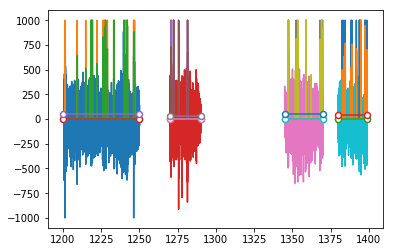

In [28]:
clipped_lfp = my_lfp.clip(-1000,1000)
npl.plot(clipped_lfp)
means = [snippet.mean() for snippet in clipped_lfp]
print(means)
print(clipped_lfp.support)
print(clipped_lfp)
npl.plot(clipped_lfp.support, means)

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:830: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:830: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


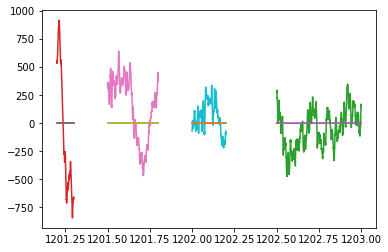

In [29]:
partialSupportForEtienne = EpochArray([[1200,1200.5], [1201.2,1201.3], [1201.5,1201.8],
                                       [1202,1202.2], [1202.5,1203]],fs=1)
mySuperRestrictedLFP = clipped_lfp[partialSupportForEtienne]
npl.plot(mySuperRestrictedLFP)

In [30]:
print(mySuperRestrictedLFP.n_signals, mySuperRestrictedLFP.n_epochs)
print(mySuperRestrictedLFP.ydata.shape)
print(mySuperRestrictedLFP.mean(), np.mean(mySuperRestrictedLFP.ydata,axis=0))
print(np.mean(mySuperRestrictedLFP.ydata,axis=1).shape)

3 5
(3, 3304)
[ 17.10528904   0.           0.        ] [ 185.185  180.765  179.01  ...,   54.535   49.725   47.19 ]
(3,)


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


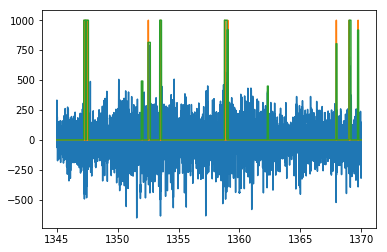

In [31]:
mynewlfp = clipped_lfp[2]
npl.plot(mynewlfp)

In [32]:
[snippet.ydata.argmax() for snippet in clipped_lfp]

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1540: FutureWarning: comparison to `None` will result in an e

[149974, 61517, 81775, 64834]

# Random

In [33]:
cow = np.array([[1,3,3],[3,1,3],[3,1,3],[3,1,1]])
cow.transpose().shape[0]

3

In [34]:
cow.shape,cow.size

((4, 3), 12)

In [35]:
cow[:,[0,1]]

array([[1, 3],
       [3, 1],
       [3, 1],
       [3, 1]])

In [36]:
cmoo = "%s cows %s moos" %(4,56)
print(cmoo)

4 cows 56 moos


In [37]:
moo = np.squeeze(cow)
moo.shape

(4, 3)

In [38]:
try:
    if(timeStamps.shape[1]==cow.shape[1]):
        print("moo")
except:
    print("heyy")

heyy


In [39]:
moo = [1,3,45]
moo = np.squeeze(moo).astype(float)
moo = np.array(moo, ndmin=2)
moo.shape

(1, 3)

In [40]:
np.zeros([0,3]).shape

(0, 3)

# Interpolation

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1479: UserWarning: support created with given ydata! support is entire signal


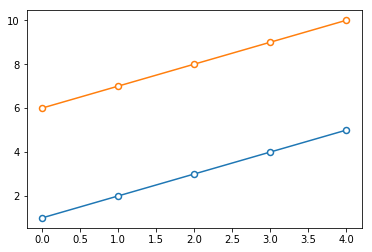

In [68]:
testing = AnalogSignalArray([[1,2,3,4,5],[6,7,8,9,10]])
npl.plot(testing,marker='o')

In [72]:
testing.asarray(at=[-1,3,5])

XYArray(xvals=array([-1,  3,  5]), yvals=array([[ nan,   4.,  nan],
       [ nan,   9.,  nan]]))

In [62]:
testing.support

<EpochArray at 0x7fa4e646bef0: 1 epoch> of duration 4 seconds

In [69]:
testingASA = testing.simplify(n_points=30)
testingASA.n_samples,testingASA.n_signals

(31, 2)

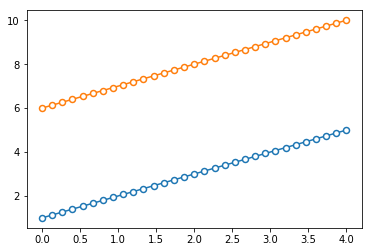

In [70]:
npl.plot(testingASA,marker='o')